Math 156 Problem 4 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn

In [5]:
df = pd.read_csv('/Users/ernest/Downloads/Math 156/Math156HW/HW 2 Code/wine+quality/winequality-red.csv', delimiter = ";")
print(df.head())

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Part A 

In [27]:
# Loading the Data, response: wine quality, predictor: everything else 
X = df.loc[:, "volatile acidity":"alcohol"].values 
y = df['quality'].values 

Part B

In [18]:
# Split the data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

Part C

In [20]:
# Train the data using the normal equation to find the weights of the linear regression model 
X_train_b  = np.c_[np.ones((X_train.shape[0], 1)), X_train]
w = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Predicton on the training set 
y_train_pred = X_train_b.dot(w)

Part D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


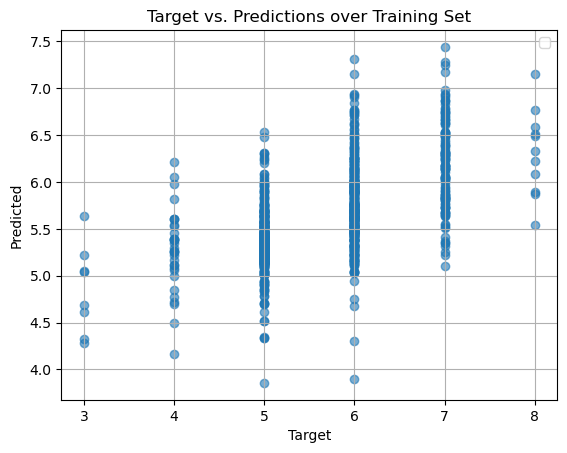

In [22]:
plt.scatter(y_train, y_train_pred, alpha = 0.6) 
plt.title("Target vs. Predictions over Training Set")
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.legend() 
plt.grid(True)
plt.show()

Since majority of the points in this scatter plot do not lie on the line y = x, it shows the inaccuracy of the model as there is a spread of data points both above and below the line across every level of the wine quality values. For target values like 3 and 8, there are very few points yet with predictions relativley close to the target value. This shows that there could be bias in the model caused by outliers. 

Part E

In [23]:
# Find the RMSE for the training set 
RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(RMSE_train)

# Find the RMSE for the testing set 
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_pred = X_test_b.dot(w)
RMSE_test = mean_squared_error(y_test_pred, y_test, squared=False)
print(RMSE_test)

0.6464914026141227
0.6547250880472117


Part F

In [24]:
# Gradient Descent function
def GD(w0, alpha, epochs=500, X=None, y=None):
    m, n = X.shape
    for epoch in range(epochs):
        # Shuffle data at the start of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Stochastic Gradient Descent
        for i in range(m):
            rand_int = np.random.randint(0, m)
            x_i = X_shuffled[rand_int]
            y_i = y_shuffled[rand_int] 
            
            # Prediction
            prediction = np.dot(x_i, w0)
            error = prediction - y_i 
            
            # Gradient update
            grad = error * x_i
            w0 = w0 - alpha * grad 
    return w0

# Hyperparameters
alpha = 0.001
epochs = 1000

# Initialize weights (number of features)
w = np.ones(X_train_b.shape[1])

# Run Gradient Descent to get the final weights
weights = GD(w, alpha, epochs=epochs, X=X_train_b, y=y_train)

# Make predictions on the training and testing datasets
y_LMSE_train_pred = np.dot(X_train_b, weights)
y_LMSE_test_pred = np.dot(X_test_b, weights)

# Compute RMSE for training and testing datasets
LMS_RMSE_train = mean_squared_error(y_train, y_LMSE_train_pred, squared=False)
LMS_RMSE_test = mean_squared_error(y_test, y_LMSE_test_pred, squared=False)


LMS RMSE (Train): 0.7568584736426989
LMS RMSE (Test): 0.7710863749715224


Part G

In [26]:
# Output the results
print("LMS RMSE (Train):", LMS_RMSE_train)
print("LMS RMSE (Test):", LMS_RMSE_test)

LMS RMSE (Train): 0.7568584736426989
LMS RMSE (Test): 0.7710863749715224
